In [43]:
import hicstraw
import pandas as pd
import os


In [47]:
def extract_hic_csv(file_path, save_path, resolution=100000, normalization="KR"):
    os.makedirs(save_path, exist_ok=True)
    unit = "BP"
    matrix_type = "observed"

    for file_name in os.listdir(file_path):
        if file_name.startswith('.') or not file_name.endswith('.hic'):
            continue  # Skip hidden/system files and non-hic files

        hic_full_path = os.path.join(file_path, file_name)
        print(f"Processing file: {file_name}")
        try:
            hic = hicstraw.HiCFile(hic_full_path)
            chromosomes = [c.name for c in hic.getChromosomes() if c.name.startswith("chr") and c.name != "chrM"]

            for chrom in chromosomes:
                records = hicstraw.straw(matrix_type, normalization, hic_full_path, chrom, chrom, unit, resolution)
                if not records:
                    print(f"  No data for {chrom}")
                    continue

                # Prepare output folder per chromosome
                chrom_folder = os.path.join(save_path, chrom)
                os.makedirs(chrom_folder, exist_ok=True)

                # Create dataframe
                df = pd.DataFrame([{
                    "chr": chrom,
                    "bin1_start": r.binX,
                    "bin2_start": r.binY,
                    "contact_count": r.counts
                } for r in records])

                # Save CSV
                output_name = f"{os.path.splitext(file_name)[0]}_{chrom}.csv"
                output_path = os.path.join(chrom_folder, output_name)
                df.to_csv(output_path, index=False)
                print(f"  Saved: {output_path}")

        except Exception as e:
            print(f"Error processing {file_name}: {e}")

In [48]:
file_path = 'data/green_monkey/hic_files/'
save_path = 'data/green_monkey/hic_csv_files/'
extract_hic_csv(file_path, save_path)


Processing file: 24hrs_untr.hic
  Saved: data/green_monkey/hic_csv_files/chr1/24hrs_untr_chr1.csv
  Saved: data/green_monkey/hic_csv_files/chr2/24hrs_untr_chr2.csv
  Saved: data/green_monkey/hic_csv_files/chr3/24hrs_untr_chr3.csv
  Saved: data/green_monkey/hic_csv_files/chr4/24hrs_untr_chr4.csv
  Saved: data/green_monkey/hic_csv_files/chr5/24hrs_untr_chr5.csv
  Saved: data/green_monkey/hic_csv_files/chr6/24hrs_untr_chr6.csv
  Saved: data/green_monkey/hic_csv_files/chr7/24hrs_untr_chr7.csv
  Saved: data/green_monkey/hic_csv_files/chr8/24hrs_untr_chr8.csv
  Saved: data/green_monkey/hic_csv_files/chr9/24hrs_untr_chr9.csv
  Saved: data/green_monkey/hic_csv_files/chr10/24hrs_untr_chr10.csv
  Saved: data/green_monkey/hic_csv_files/chr11/24hrs_untr_chr11.csv
  Saved: data/green_monkey/hic_csv_files/chr12/24hrs_untr_chr12.csv
  Saved: data/green_monkey/hic_csv_files/chr13/24hrs_untr_chr13.csv
  Saved: data/green_monkey/hic_csv_files/chr14/24hrs_untr_chr14.csv
  Saved: data/green_monkey/hic_csv

  Saved: data/green_monkey/hic_csv_files/chr30/12hrs_untr_chr30.csv
  Saved: data/green_monkey/hic_csv_files/chr31/12hrs_untr_chr31.csv
Processing file: 24hrs_vacv.hic
  Saved: data/green_monkey/hic_csv_files/chr1/24hrs_vacv_chr1.csv
  Saved: data/green_monkey/hic_csv_files/chr2/24hrs_vacv_chr2.csv
  Saved: data/green_monkey/hic_csv_files/chr3/24hrs_vacv_chr3.csv
  Saved: data/green_monkey/hic_csv_files/chr4/24hrs_vacv_chr4.csv
  Saved: data/green_monkey/hic_csv_files/chr5/24hrs_vacv_chr5.csv
  Saved: data/green_monkey/hic_csv_files/chr6/24hrs_vacv_chr6.csv
  Saved: data/green_monkey/hic_csv_files/chr7/24hrs_vacv_chr7.csv
  Saved: data/green_monkey/hic_csv_files/chr8/24hrs_vacv_chr8.csv
  Saved: data/green_monkey/hic_csv_files/chr9/24hrs_vacv_chr9.csv
  Saved: data/green_monkey/hic_csv_files/chr10/24hrs_vacv_chr10.csv
  Saved: data/green_monkey/hic_csv_files/chr11/24hrs_vacv_chr11.csv
  Saved: data/green_monkey/hic_csv_files/chr12/24hrs_vacv_chr12.csv
  Saved: data/green_monkey/hic_csv

1252


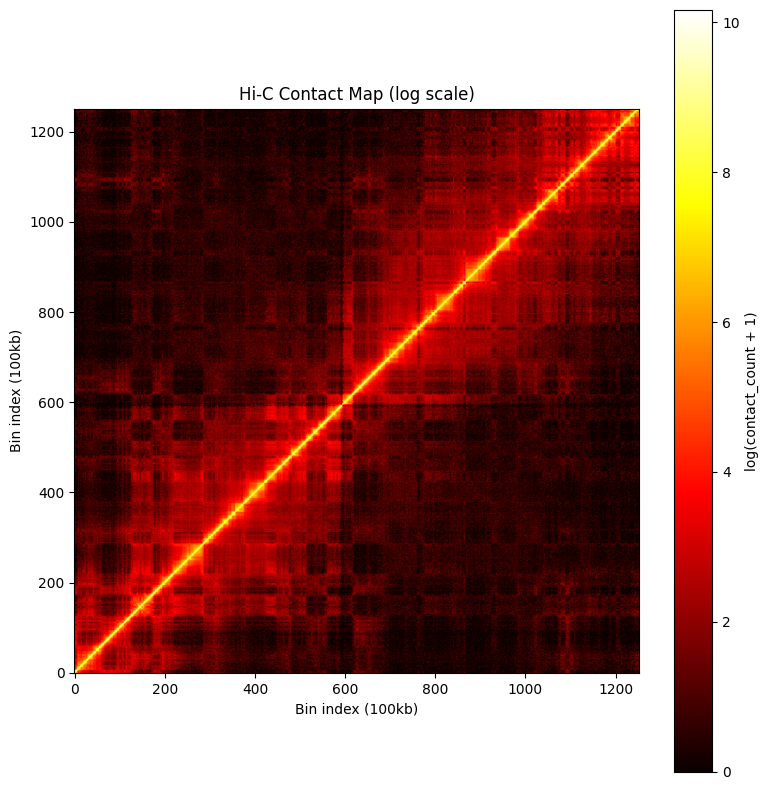

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path to one chromosome's Hi-C contacts
csv_file = 'data/green_monkey/hic_csv_files/chr1/12hrs_untr_chr1.csv'
df = pd.read_csv(csv_file)

# Get all unique bin positions
bins = sorted(set(df['bin1_start']).union(set(df['bin2_start'])))
bin_to_idx = {val: i for i, val in enumerate(bins)}
n_bins = len(bins)

print(n_bins)

# Initialize empty matrix
matrix = np.zeros((n_bins, n_bins))

max_bins = 500  # Limit to first 500 bins

# Ensure matrix is not larger than max_bins
cutoff = min(max_bins, n_bins)
submatrix = matrix[:cutoff, :cutoff]

# Fill the matrix
for _, row in df.iterrows():
    i = bin_to_idx[row['bin1_start']]
    j = bin_to_idx[row['bin2_start']]
    matrix[i, j] = row['contact_count']
    matrix[j, i] = row['contact_count']  # symmetric

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(np.log1p(matrix), cmap='hot', origin='lower')
plt.title("Hi-C Contact Map (log scale)")
plt.xlabel("Bin index (100kb)")
plt.ylabel("Bin index (100kb)")
plt.colorbar(label="log(contact_count + 1)")
plt.tight_layout()
plt.show()


In [54]:
print(matrix)

[[1.84390176e+04 6.41495410e+03 3.59953003e+03 ... 5.93379354e+00
  0.00000000e+00 0.00000000e+00]
 [6.41495410e+03 1.76990566e+04 4.83088770e+03 ... 0.00000000e+00
  4.89093447e+00 0.00000000e+00]
 [3.59953003e+03 4.83088770e+03 1.79951016e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.93379354e+00 0.00000000e+00 0.00000000e+00 ... 1.39559434e+04
  3.43765747e+03 1.61697388e+03]
 [0.00000000e+00 4.89093447e+00 0.00000000e+00 ... 3.43765747e+03
  1.43137129e+04 3.98309546e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.61697388e+03
  3.98309546e+03 1.91958926e+04]]
